# Pymaceuticals Inc

In [234]:
%matplotlib inline

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

In [236]:
clinical_trial = pd.read_csv('./data/clinicaltrial_data.csv')
mouse_data = pd.read_csv('./data/mouse_drug_data.csv')

In [237]:
df = clinical_trial.merge(mouse_data,on='Mouse ID')
drug_list = list(set(df.set_index('Drug').index.tolist()))
df = df.groupby(['Drug','Timepoint']).mean()

In [238]:
#Separating dataframes per drug
capomulin_df = df.loc['Capomulin'].reset_index()
ketapril_df = df.loc['Ketapril'].reset_index()
ceftamin_df = df.loc['Ceftamin'].reset_index()
naftisol_df = df.loc['Naftisol'].reset_index()
ramicane_df = df.loc['Ramicane'].reset_index()
zoniferol_df = df.loc['Zoniferol'].reset_index()
placebo_df = df.loc['Placebo'].reset_index()
infubinol_df = df.loc['Infubinol'].reset_index()
stelasyn_df = df.loc['Stelasyn'].reset_index()
propiva_df = df.loc['Propriva'].reset_index()

# Tumor Response to Treatment

In [239]:
#Storing standard errors as lists 
sems= clinical_trial.merge(mouse_data, on='Mouse ID').groupby('Drug')
capomulin_sem_vol = sems.get_group('Capomulin').set_index(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].unstack().sem().tolist()
infubinol_sem_vol = sems.get_group('Infubinol').set_index(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].unstack().sem().tolist()
ketapril_sem_vol = sems.get_group('Ketapril').set_index(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].unstack().sem().tolist()
placebo_sem_vol = sems.get_group('Placebo').set_index(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].unstack().sem().tolist()
capomulin_sem_met = sems.get_group('Capomulin').set_index(['Mouse ID','Timepoint'])['Metastatic Sites'].unstack().sem().tolist()
infubinol_sem_met = sems.get_group('Infubinol').set_index(['Mouse ID','Timepoint'])['Metastatic Sites'].unstack().sem().tolist()
ketapril_sem_met = sems.get_group('Ketapril').set_index(['Mouse ID','Timepoint'])['Metastatic Sites'].unstack().sem().tolist()
placebo_sem_met = sems.get_group('Placebo').set_index(['Mouse ID','Timepoint'])['Metastatic Sites'].unstack().sem().tolist()

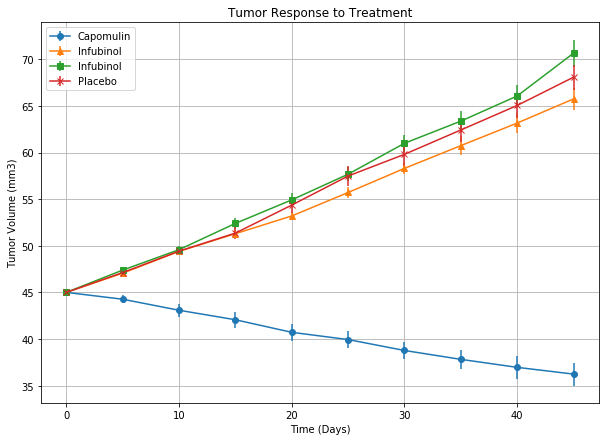

In [240]:
x_axis = df.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1).index.tolist()
y_cap = df.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Capomulin'].tolist()
y_inf= df.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Infubinol'].tolist()
y_ket = df.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Ketapril'].tolist()
y_pla = df.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Placebo'].tolist()
fig,ax=plt.subplots(figsize=(10,7))
ax.errorbar(x=x_axis,y=y_cap,yerr=capomulin_sem_vol, marker = 'o', label = 'Capomulin')
ax.errorbar(x=x_axis,y=y_inf,yerr=infubinol_sem_vol, marker='^', label='Infubinol')
ax.errorbar(x=x_axis,y=y_ket,yerr=ketapril_sem_vol, marker = 's', label = 'Infubinol' )
ax.errorbar(x=x_axis,y=y_pla,yerr=placebo_sem_vol, marker = 'x', label='Placebo')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Metastatic Response to Treatment

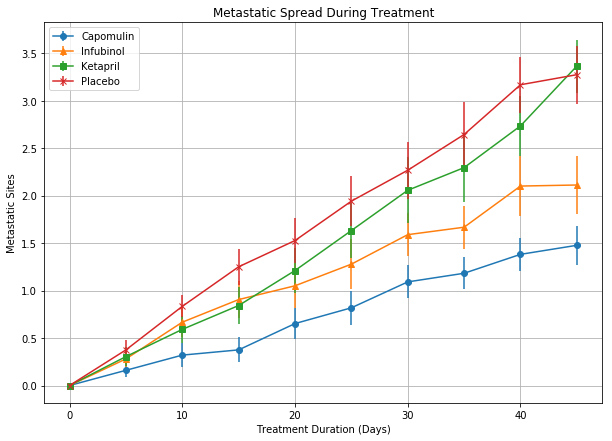

In [241]:
x_axis = df.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1).index.tolist()
y_cap_met = df.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Capomulin'].tolist()
y_inf_met= df.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Infubinol'].tolist()
y_ket_met = df.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Ketapril'].tolist()
y_pla_met = df.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack().drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis =1)['Placebo'].tolist()
fig,ax=plt.subplots(figsize=(10,7))
ax.errorbar(x=x_axis,y=y_cap_met,yerr=capomulin_sem_met, marker = 'o', label = 'Capomulin')
ax.errorbar(x=x_axis,y=y_inf_met,yerr=infubinol_sem_met, marker='^', label='Infubinol')
ax.errorbar(x=x_axis,y=y_ket_met,yerr=ketapril_sem_met, marker = 's', label = 'Ketapril' )
ax.errorbar(x=x_axis,y=y_pla_met,yerr=placebo_sem_met, marker = 'x', label='Placebo')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.legend()
plt.grid()

# Survival Rate

In [242]:
survival = clinical_trial.merge(mouse_data, on='Mouse ID').groupby(['Drug','Timepoint']).count()['Mouse ID']
survival_count = survival.unstack(level=0).drop(['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'], axis=1)
survival = survival_count.apply(lambda x: (x/25)*100)

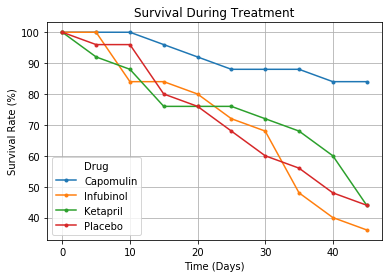

In [243]:
survival.plot(marker='.')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Summary Bar Graph

In [244]:
cap_change = (y_cap[-1]-y_cap[0])*100/y_cap[0]
inf_change = (y_inf[-1]-y_inf[0])*100/y_inf[0]
ket_change = (y_ket[-1]-y_ket[0])*100/y_ket[0]
pla_change = (y_pla[-1]-y_pla[0])*100/y_pla[0]
percent_change = [cap_change,inf_change,ket_change,pla_change]
x_bar = np.arange(len(percent_change))
labels = ['Capomulin','Infubinol','Ketapril','Placebo']

(-30, 70)

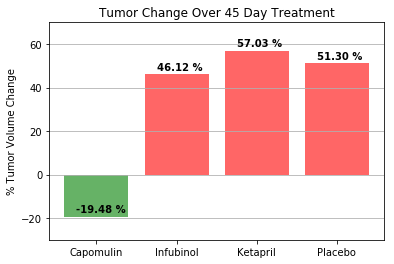

In [245]:
fig,ax = plt.subplots()
plt.grid(axis='y')
plt.bar(x_bar,percent_change, align = 'center', alpha = 0.6, color=['green','red','red','red'])
plt.xticks(x_bar, labels)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
for a,b in enumerate(percent_change):
    ax.text(a-0.25,b+2,'%.2f'%b+' %',color='black',fontweight='bold')
plt.ylim(-30,70)

# Observable Trends

1. Based on the graph showing the response of the tumor to the different treatments, we can conclude that Capomulin is most efficient at decreasing the size of the tumor compared to Capomulin, Infubinol, and Ketapril. 

2. Similarly, based on the trend shown by the metastatic spread during treatment, Capomulin is the most efficient at slowing down the increase in metastatic sites. 

3. Although all mice populations experience a decrease in numbers, Capomulin has a smaller negative slope which shows that it has a higher survival rate than the rest. The other three drugs have a similar high death rate. 